### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
current_palette = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from IPython.display import clear_output
sns.set_style('darkgrid')
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics as mt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from plot_confusion_matrix import plot_confusion_matrix
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,34))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
import obtain as ob

### Obtain

In [2]:
poverty_df = ob.upload_county_acs_data('ACSDP5Y2012.DP03_data_with_overlays_2019-12-31T163946.csv')
df = poverty_df
population_df = ob.upload_county_acs_data('ACSDP5Y2012.DP05_data_with_overlays_2019-12-31T193014.csv')
df = ob.merge_acs_data(df,population_df)
df = ob.remove_duplicate_countystate(df) 
num_df, object_df = ob.separate_num_columns(df)
pull_columns = [i for i in num_df.columns]
cms_df = ob.cms_data()
df = cms_df.merge(df.drop(columns =['County','State']), how='left', on=['CountyState'])
model_df = df
target = 'ratio_to_max_payment'
step = 10
bins = [i/100 for i in range(0,100+step,step)]
bins[-1] +=.01
cms_labels =ob.cms_procedure_dummy_labels(df).columns
num_df, object_df = ob.separate_num_columns(model_df)
num_df, a = ob.remove_cms(num_df)

In [3]:
def random_forest(data, target_column='ratio_to_max_payment', show=20, n_estimators=100, max_depth = 5):
    y= data[target_column]
    X = data.drop(columns=[target_column])
    data_train, data_test, target_train, target_test = train_test_split(X, y, 
                                                                        test_size = 0.25)


    forest = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=max_depth)
    forest.fit(data_train,target_train)
    df_feature_importance = pd.Series(data = forest.feature_importances_, index= X.columns).sort_values(ascending=False)
    print(df_feature_importance[:show])
    print(forest.score(data_train,target_train), forest.score(data_test,target_test))
    return forest, df_feature_importance


In [4]:
dsd = pd.cut(df[target],bins, right=False).unique()
dsd = dsd.sort_values().astype(str)
num_df[target] = pd.cut(df[target],bins, right=False).astype(str)
#num_df[target] = num_df[target].apply(lambda x:'(0.9, 1.0]' if x == 'nan')


In [5]:
model_clean, feat = random_forest(num_df)
X = num_df.drop(columns=[target])
pred = model_clean.predict(X)
cnf_matrix = confusion_matrix(num_df[target], pred)

Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                         0.051632
BRONCHITIS_&_ASTHMA                                                                                         0.042062
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone                                                 0.039968
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE                                                                       0.031252
Percent_RACE_One_race_Asian                                                                                 0.030365
COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                                 0.024969
with_mcc                                                                                                    0.024080
Percent_RACE_One_race_Asian_Chinese                                                                         0.023739
HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Two_or_more_r

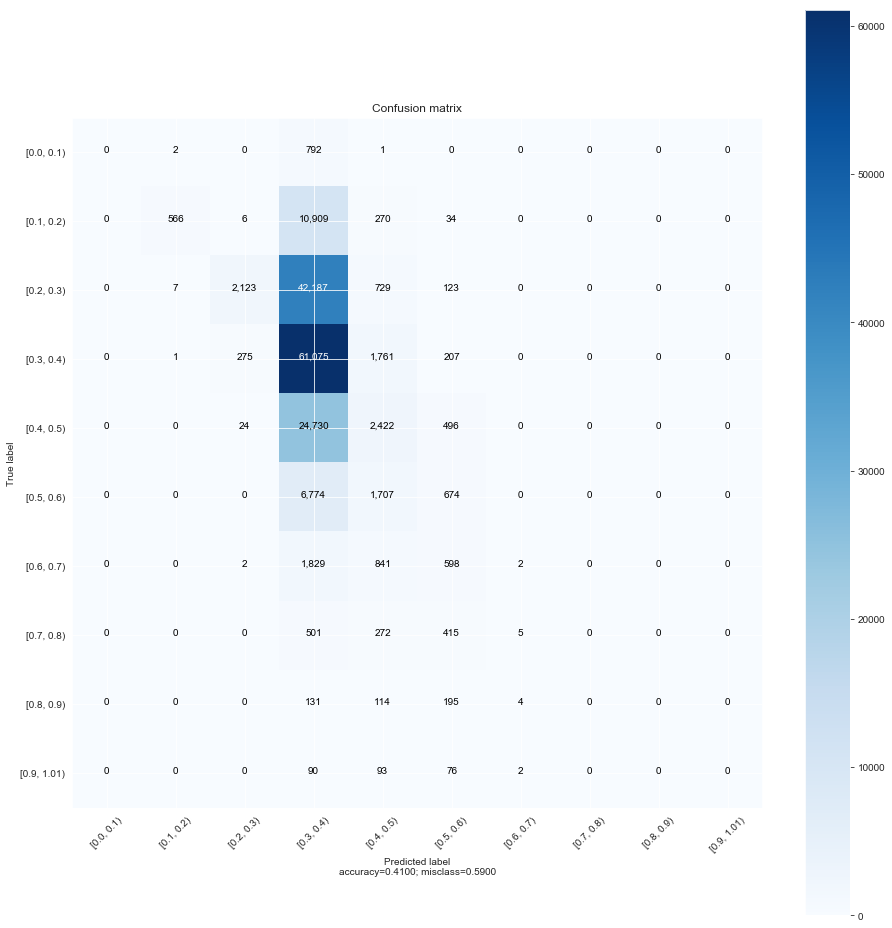

In [7]:

ax = plot_confusion_matrix(cnf_matrix, dsd, normalize=False)


(0.2, 0.3]
with_mcc                                                                                                    0.068493
MISC_DISORDERS_OF_NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES                                                  0.043167
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                         0.033227
MEDICAL_BACK_PROBLEMS                                                                                       0.031512
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS                                                                   0.027887
RACE_Asian                                                                                                  0.027212
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone                                                 0.023871
ESOPHAGITIS,_GASTROENT_&_MISC_DIGEST_DISORDERS                                                              0.023440
RACE_One_race_Asian                                  

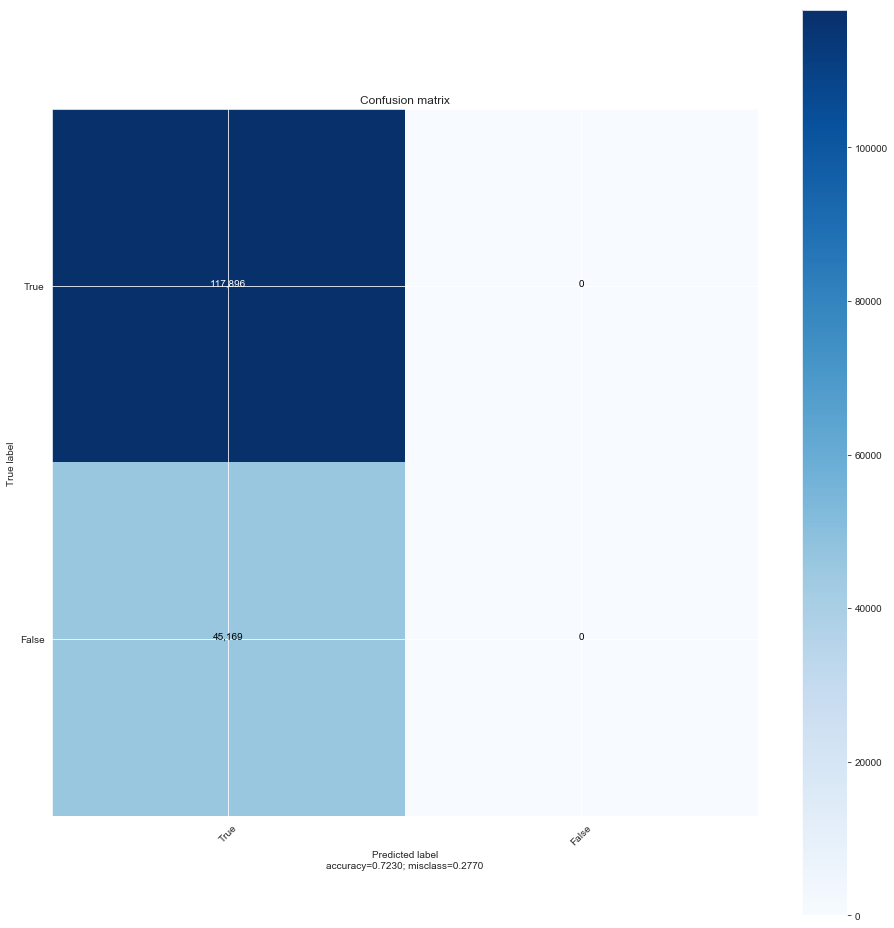

(0.3, 0.4]
BRONCHITIS_&_ASTHMA                                                    0.069110
SIGNS_&_SYMPTOMS                                                       0.045942
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE                                  0.043165
COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)            0.031443
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.028396
with_mcc                                                               0.026239
with_ccmcc                                                             0.025538
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone            0.025284
MISC_DISORDERS_OF_NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES             0.024672
RESPIRATORY_INFECTIONS_&_INFLAMMATIONS                                 0.023798
dtype: float64
0.6123567024808255 0.6097088331248314


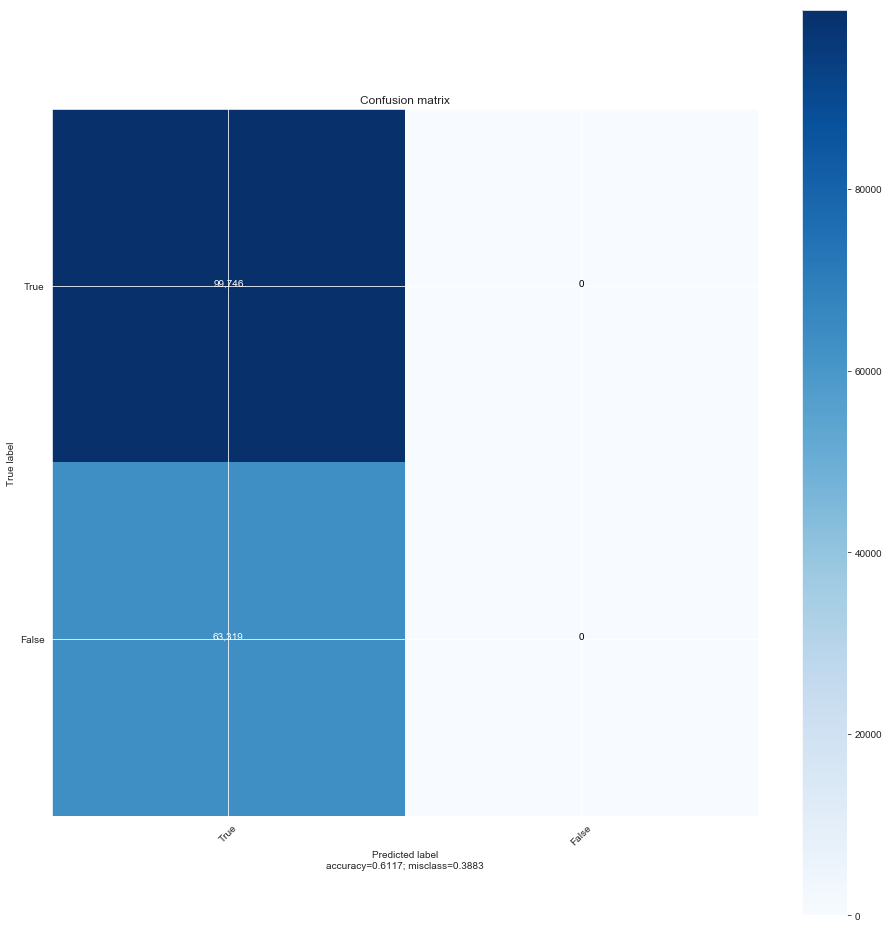

(0.4, 0.5]
COMMUTING_TO_WORK_Walked                                                                                 0.044655
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone                                              0.038910
RACE_One_race_Some_other_race                                                                            0.038908
with_mcc                                                                                                 0.028014
LAPAROSCOPIC_CHOLECYSTECTOMY                                                                             0.025616
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                      0.022071
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS                                                                0.021760
Percent_COMMUTING_TO_WORK_Walked                                                                         0.018072
COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                  

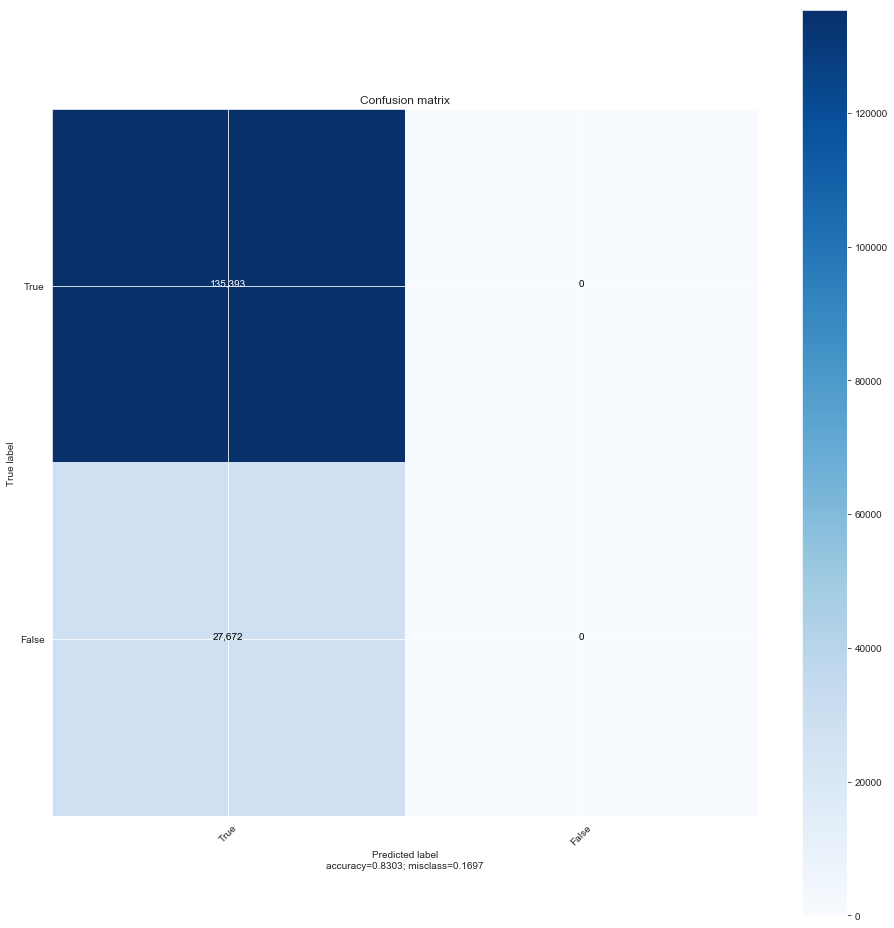

(0.1, 0.2]
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE        0.131547
BRONCHITIS_&_ASTHMA                          0.125734
PERC_CARDIOVASC_PROC                         0.103939
SIGNS_&_SYMPTOMS                             0.103453
with_cc                                      0.065240
with_ccmcc                                   0.061081
SPINAL_FUSION_EXCEPT_CERVICAL                0.037460
CHRONIC_OBSTRUCTIVE_PULMONARY_DISEASE        0.030244
ATHEROSCLEROSIS                              0.026568
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS    0.019549
dtype: float64
0.9283389752898658 0.9258959452498344


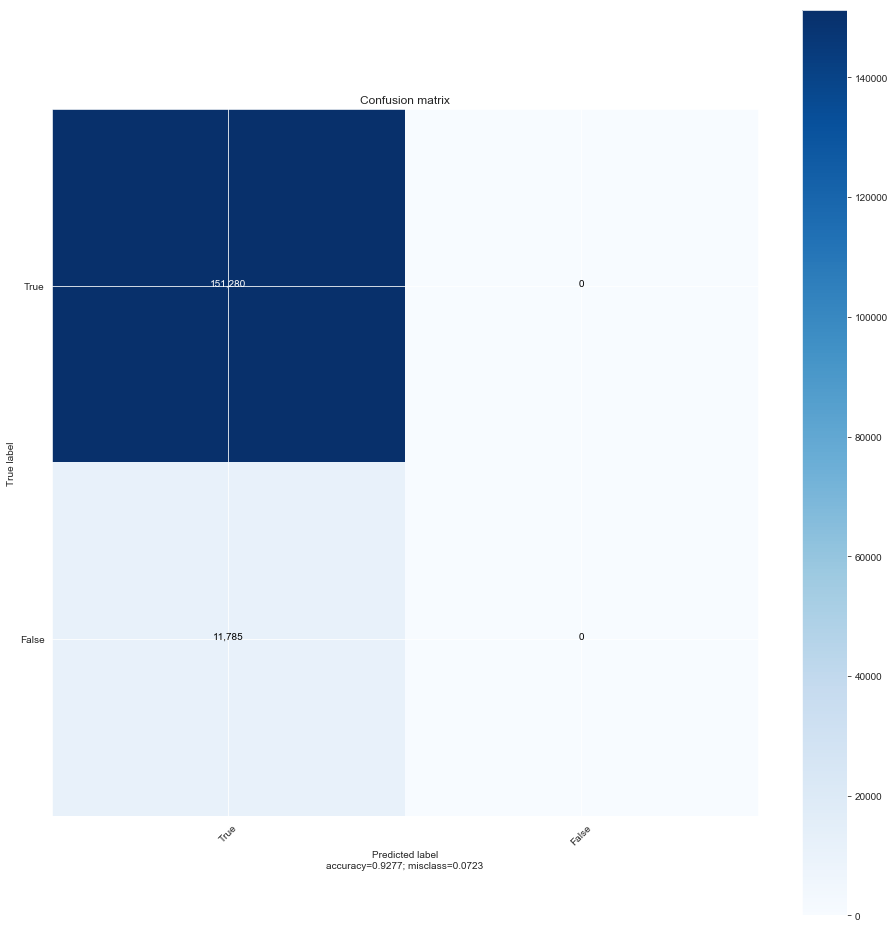

(0.0, 0.1]
BRONCHITIS_&_ASTHMA                      0.237286
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE    0.149649
with_mcc                                 0.072311
with_cc                                  0.036807
without_ccmcc                            0.024462
Percent_RACE_One_race_Some_other_race    0.014817
RACE_Some_other_race                     0.013150
RACE_One_race_Asian_Japanese             0.012674
Percent_COMMUTING_TO_WORK_Walked         0.011983
Percent_RACE_Some_other_race             0.011327
dtype: float64
0.9951021275899851 0.9951921897613266


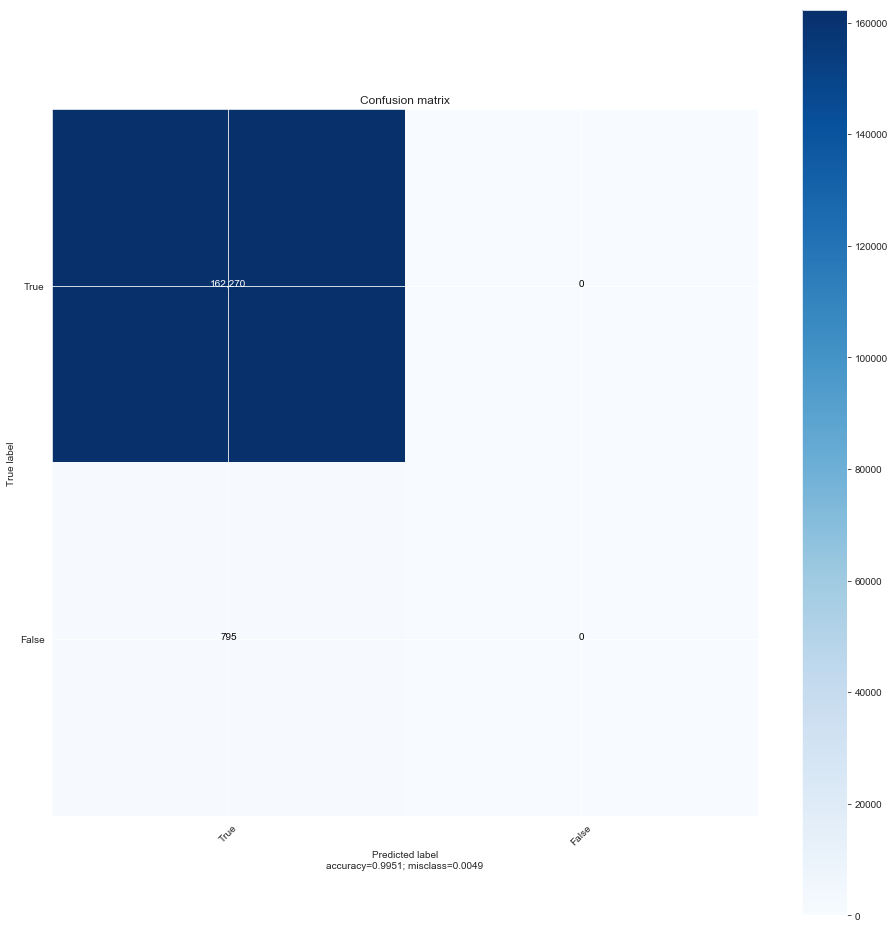

(0.5, 0.6]
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone                                                 0.043351
Percent_RACE_One_race_Asian_Chinese                                                                         0.032437
RACE_Asian                                                                                                  0.026517
COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                                 0.026169
RACE_One_race_Asian_Chinese                                                                                 0.025244
RACE_One_race_Asian                                                                                         0.023973
Percent_HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Asian_alone                                      0.023440
HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Two_or_more_races_Two_races_including_Some_other_race    0.021909
Percent_COMMUTING_TO_WORK_Public_transportation_(excl

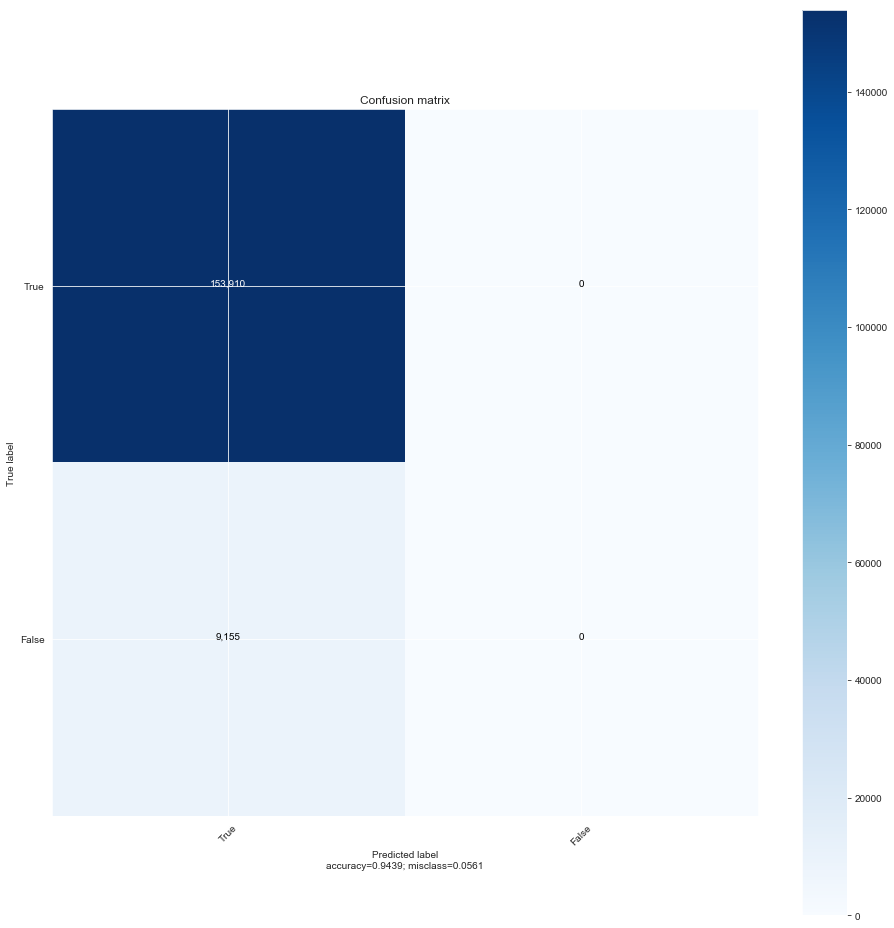

(0.6, 0.7]
RACE_One_race_Asian_Chinese                                                                                 0.033877
COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                                 0.033673
Percent_RACE_Asian                                                                                          0.032116
Percent_HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Asian_alone                                      0.031421
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone                                                 0.029074
HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Two_or_more_races_Two_races_including_Some_other_race    0.029009
HISPANIC_OR_LATINO_AND_RACE_Hispanic_or_Latino_(of_any_race)_Other_Hispanic_or_Latino                       0.028809
HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Asian_alone                                              0.027032
Percent_COMMUTING_TO_WORK_Public_transportation_(excl

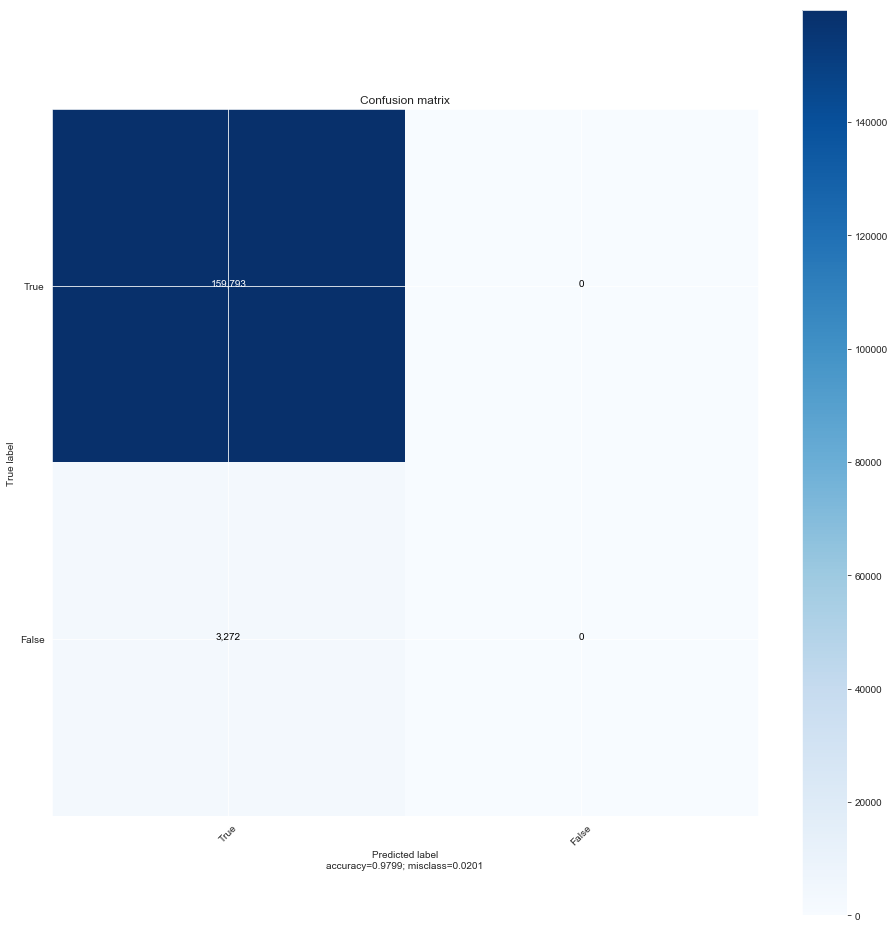

(0.9, 1.01]
Percent_RACE_One_race_White                                                                                                    0.023588
Percent_HEALTH_INSURANCE_COVERAGE_In_labor_force_Unemployed_No_health_insurance_coverage                                       0.019316
INCOME_AND_BENEFITS_(IN_2012_INFLATION-ADJUSTED_DOLLARS)_Median_earnings_for_female_full-time,_year-round_workers_(dollars)    0.018507
Percent_INDUSTRY_Retail_trade                                                                                                  0.017618
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                                            0.017209
Percent_RACE_One_race_Asian                                                                                                    0.015716
Percent_HISPANIC_OR_LATINO_AND_RACE_Hispanic_or_Latino_(of_any_race)_Other_Hispanic_or_Latino                                  0.014668
Percent_RACE_White                  

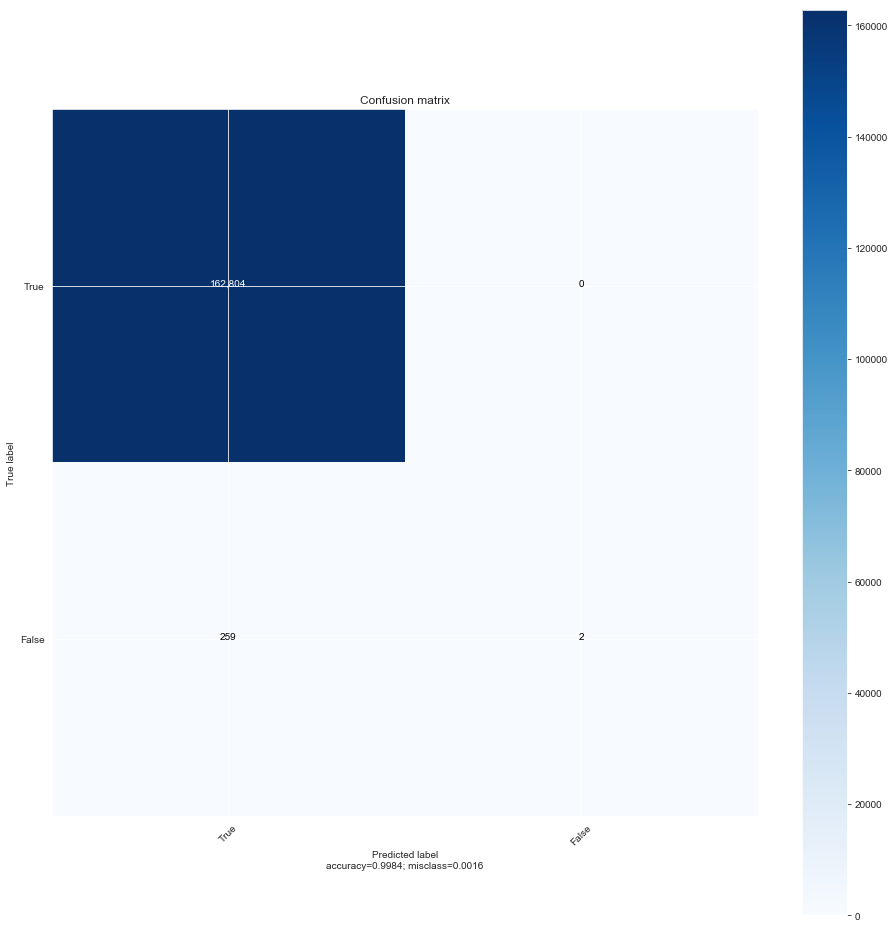

(0.7, 0.8]
Percent_RACE_One_race_Asian_Chinese                                    0.047972
Percent_COMMUTING_TO_WORK_Walked                                       0.035645
COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)            0.031107
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.028572
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone            0.024978
RACE_One_race_Asian_Korean                                             0.024010
CLASS_OF_WORKER_Government_workers                                     0.023525
RACE_One_race_Asian_Chinese                                            0.021731
HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Asian_alone         0.018552
RACE_One_race_Asian                                                    0.017291
dtype: float64
0.9924937447873228 0.9932543478794122


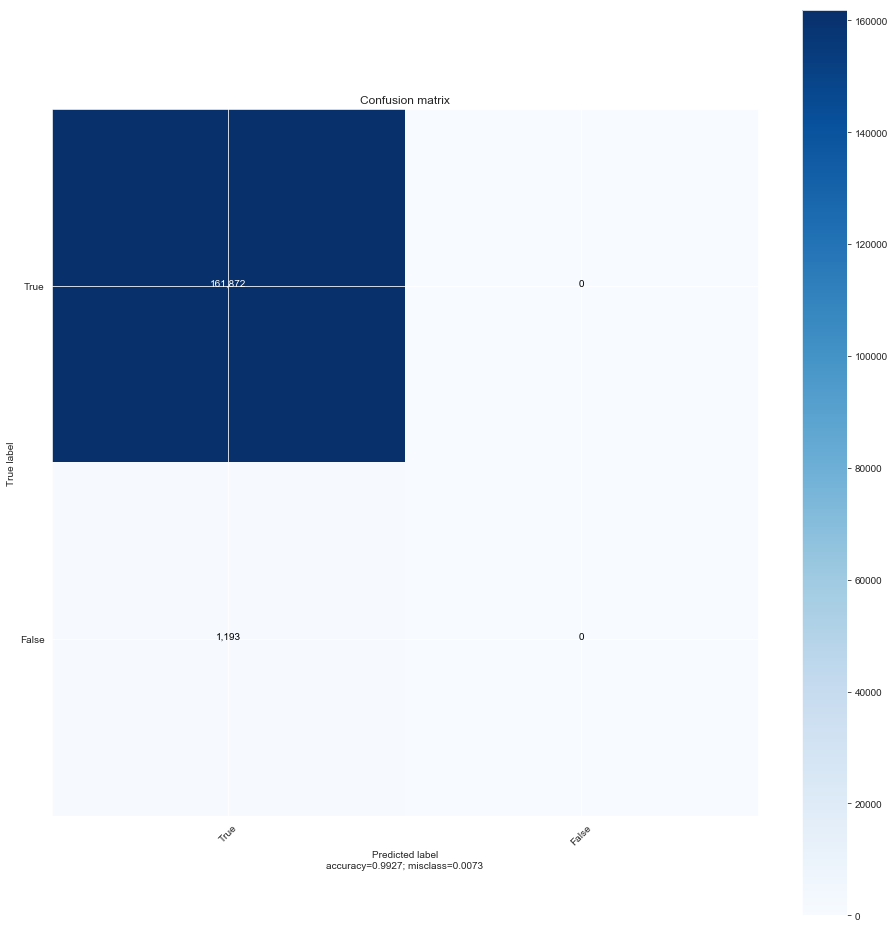

(0.8, 0.9]
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                              0.035628
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone                                      0.033477
COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                      0.026431
Percent_RACE_One_race_Asian_Chinese                                                              0.023786
Percent_COMMUTING_TO_WORK_Walked                                                                 0.020354
HISPANIC_OR_LATINO_AND_RACE_Hispanic_or_Latino_(of_any_race)_Puerto_Rican                        0.018511
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_carpooled                                        0.017575
Percent_RACE_White                                                                               0.017205
RACE_One_race_Asian                                                                              0.016392
Percent_HISPANIC_OR_LATINO_AND_RACE

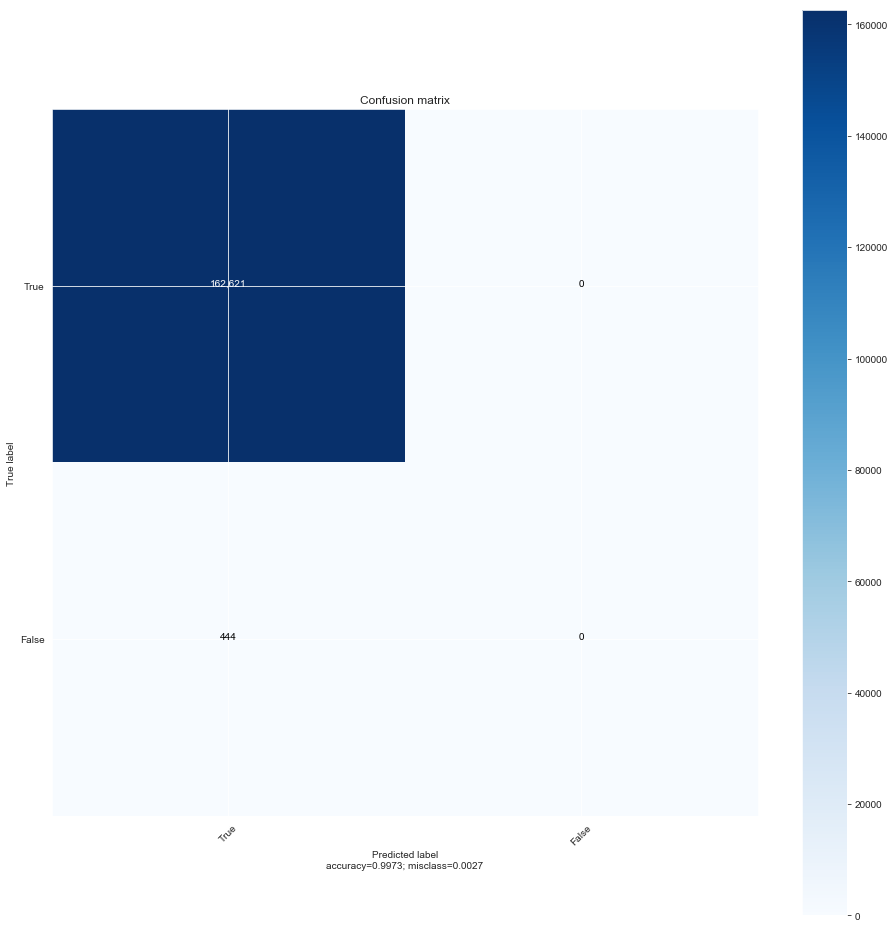

In [14]:
label = pd.cut(df[target],bins).astype(str)
predicted = []
true_false= [True, False]
for i in label.unique():
    num_df[target] = label == i
    print(i)
    model_clean, feat = random_forest(num_df, show=1)
    X = num_df.drop(columns=[target])
    a = float(i.split(',')[0][1:])- float(i.split(',')[1][:-1])/2

    pred = model_clean.predict(X)
    cnf_matrix = confusion_matrix(num_df[target], pred)
    ax = plot_confusion_matrix(cnf_matrix, true_false, normalize=False)
    plt.show()
    predicted.append(list(model_clean.predict(X)*a))

BRONCHITIS_&_ASTHMA    0.214161
dtype: float64
0.9950448903498013 0.9953638972698506


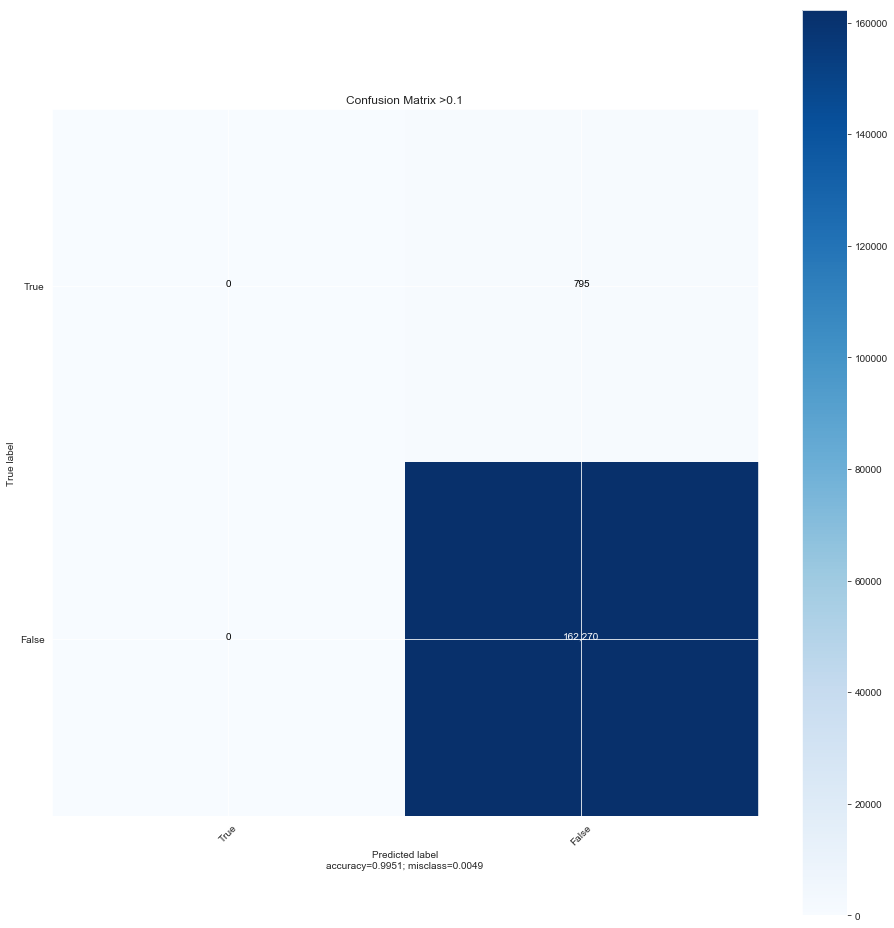

BRONCHITIS_&_ASTHMA    0.15188
dtype: float64
0.9231630934275294 0.9219221429097064


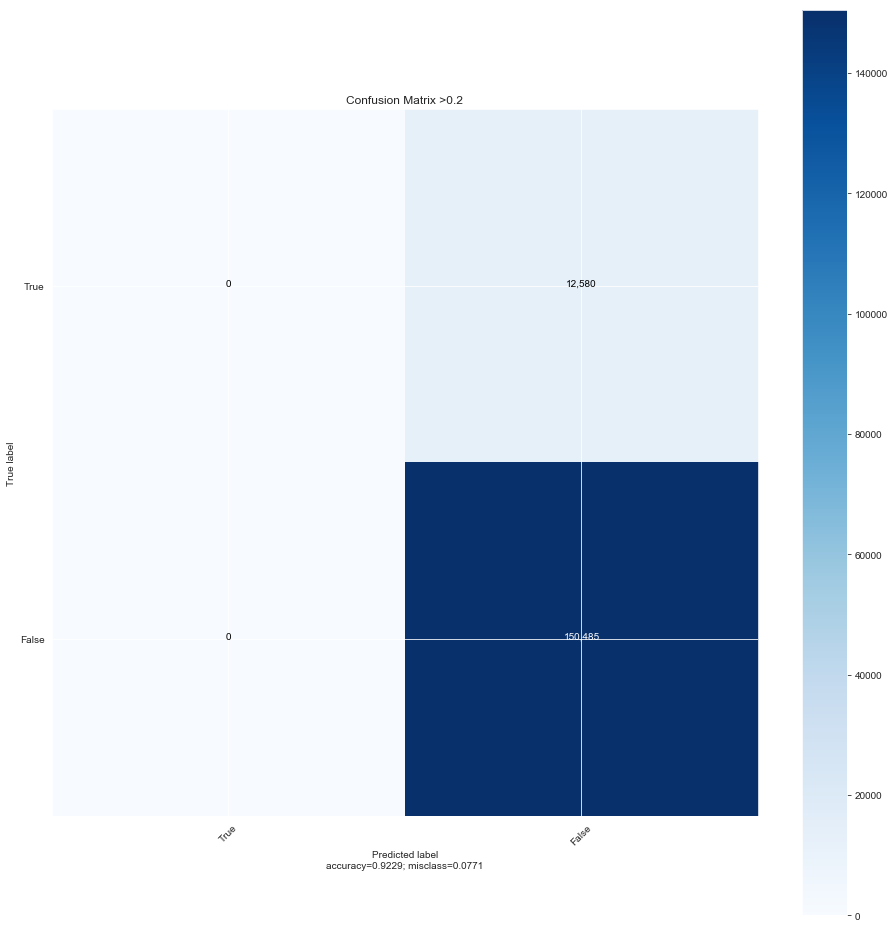

BRONCHITIS_&_ASTHMA    0.056038
dtype: float64
0.6662823594825753 0.664066524394731


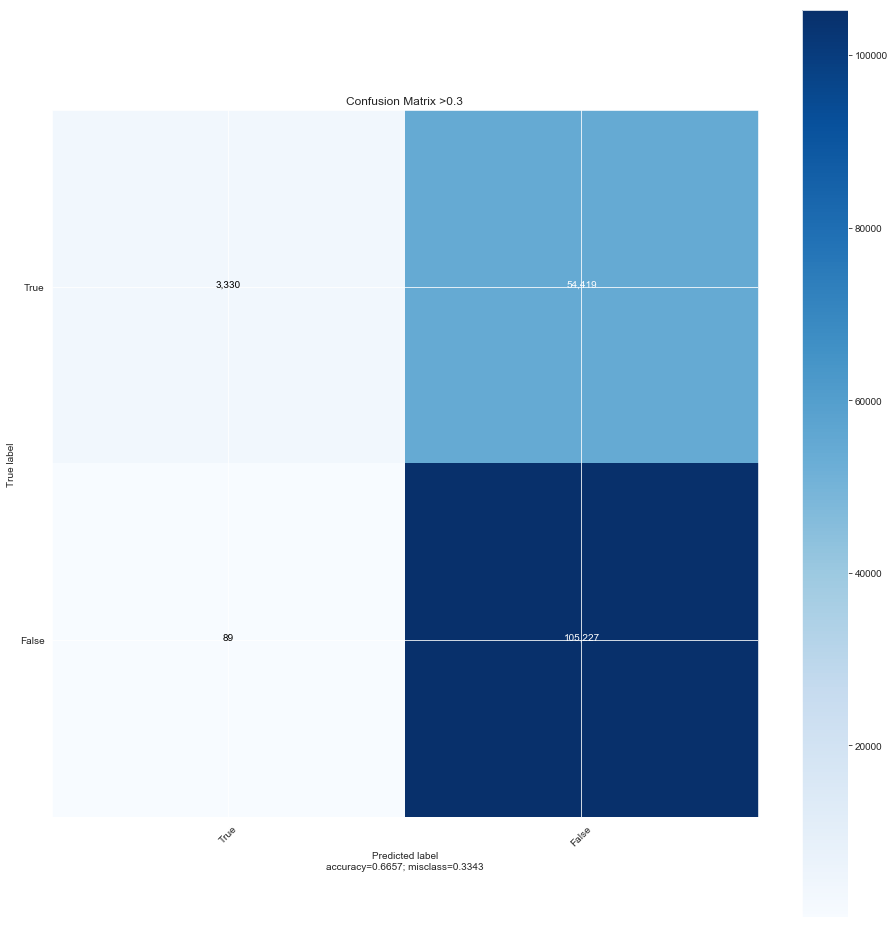

Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.051038
dtype: float64
0.778033982567172 0.778644491868423


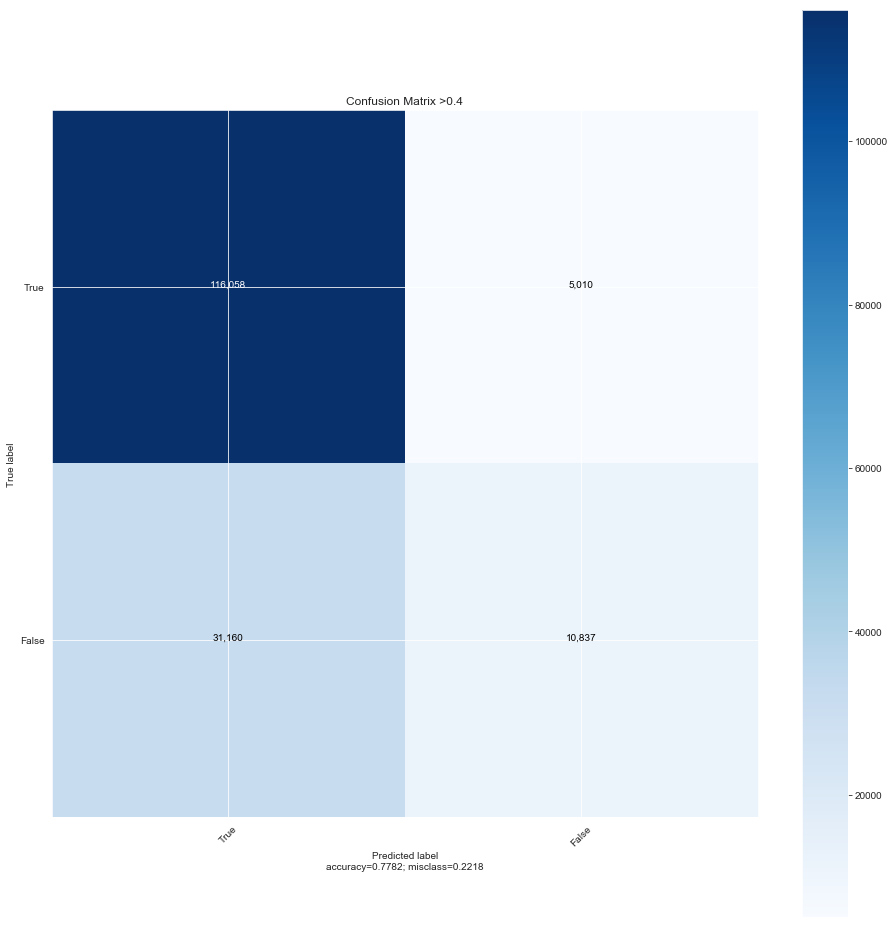

Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.055456
dtype: float64
0.9188784771623412 0.9191502931292467


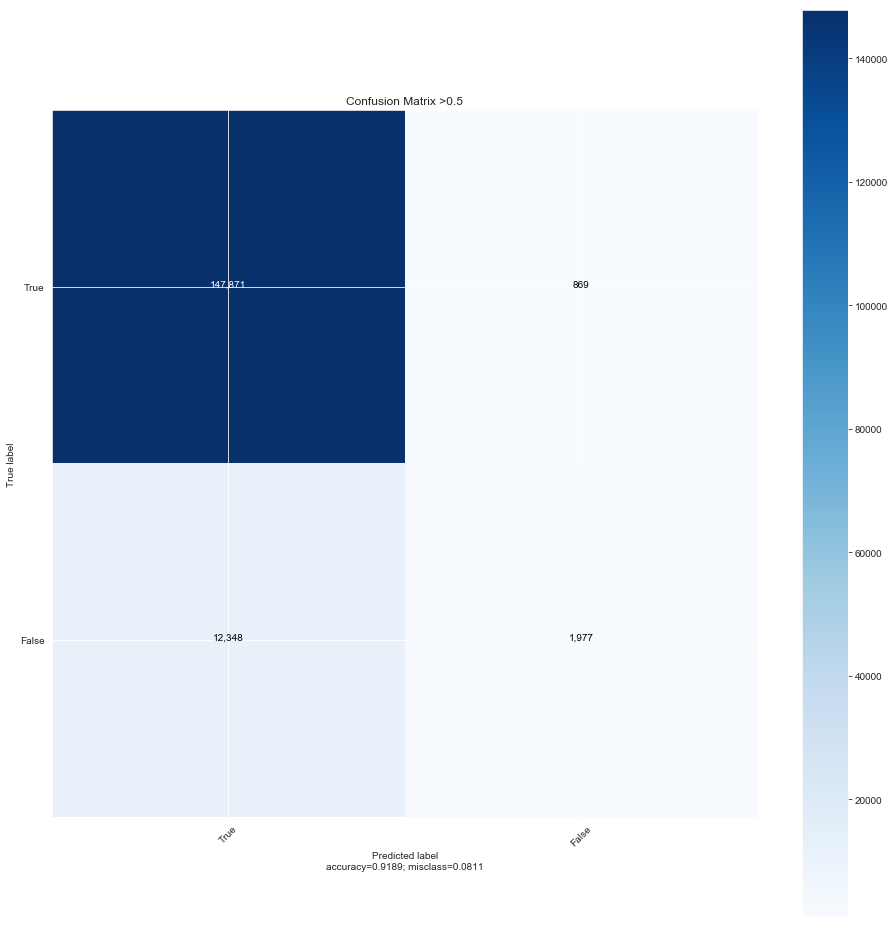

Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone    0.052869
dtype: float64
0.9687893506026264 0.9699266563642162


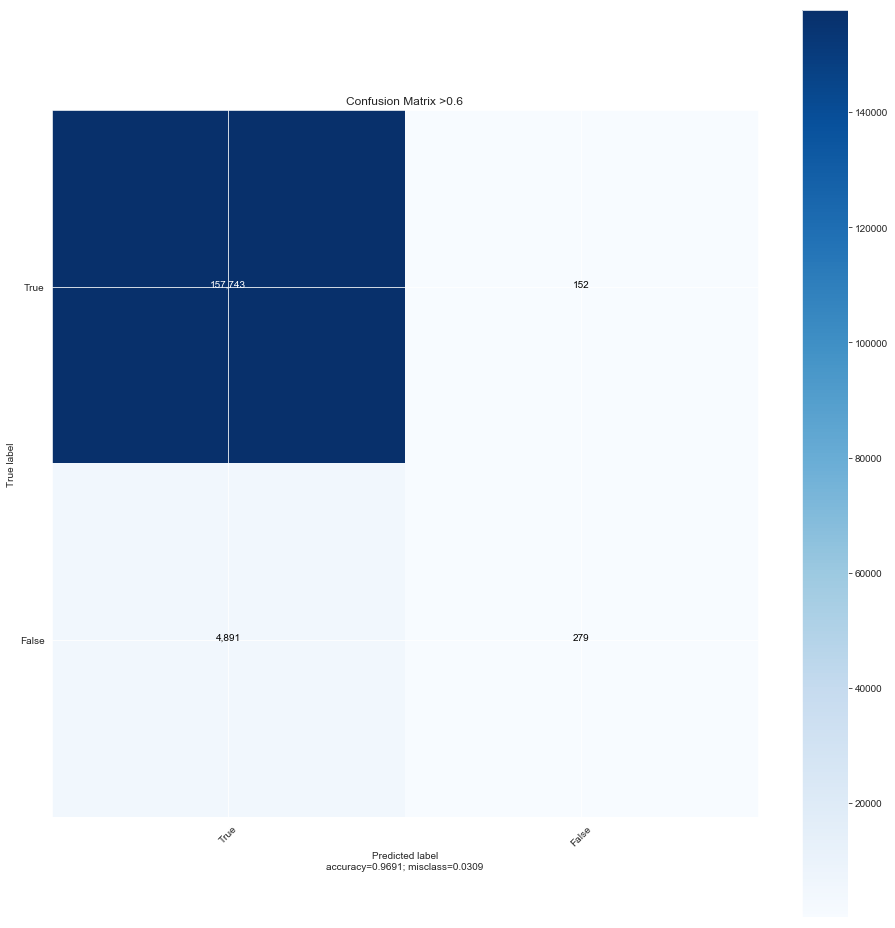

Percent_RACE_One_race_Asian_Chinese    0.048486
dtype: float64
0.988691556689398 0.9873672333014448


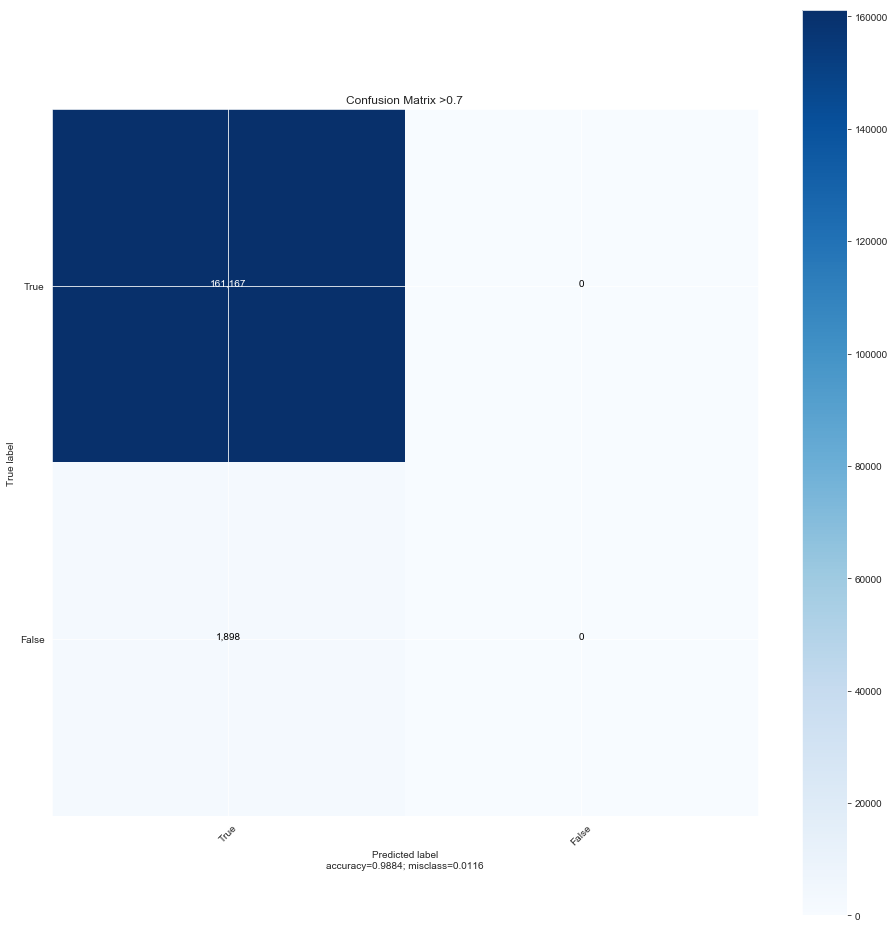

Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone    0.03663
dtype: float64
0.9957399139806048 0.9955356047783747


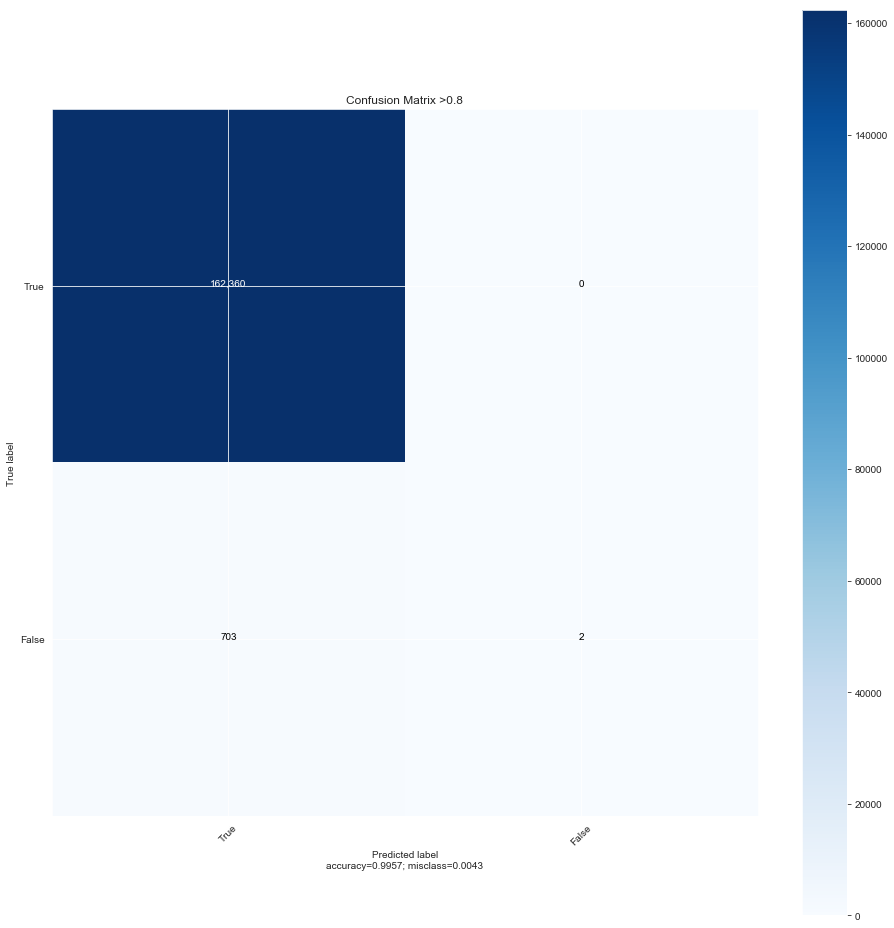

Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.028468
dtype: float64
0.9984464177664394 0.9983074545588344


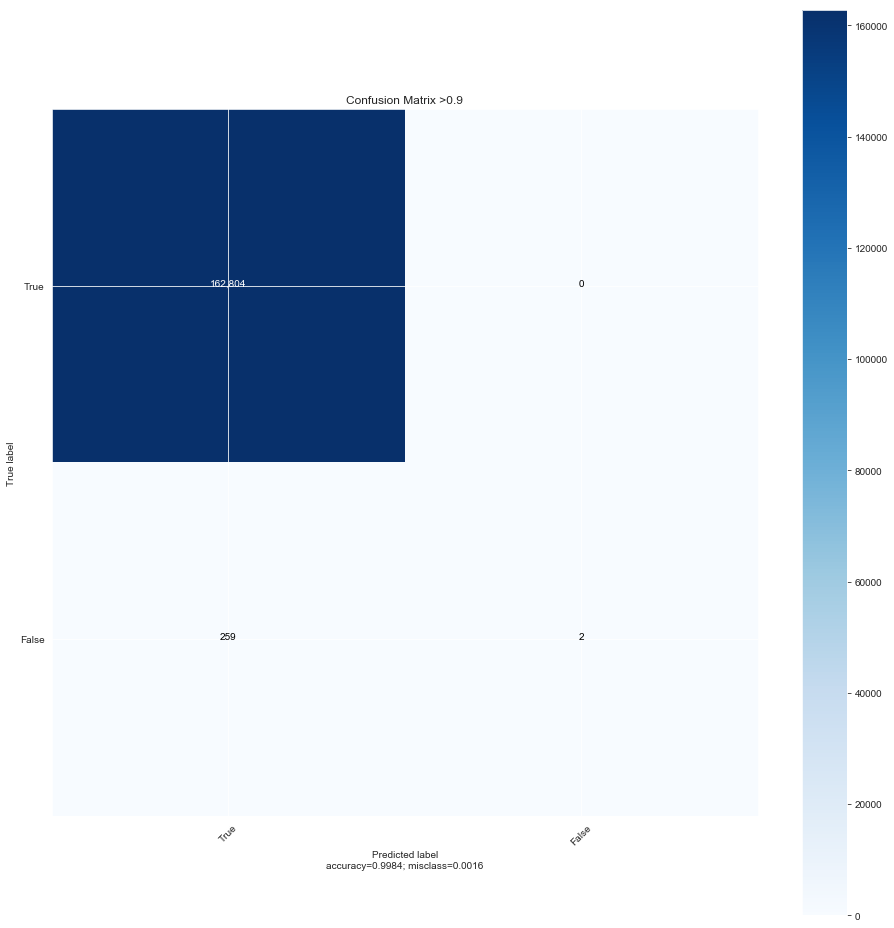

In [19]:

true_false= [True, False]
for i in bins[1:-1]:
    num_df[target] = df[target] > i
    
    model_clean, feat = random_forest(num_df, show=1)
    X = num_df.drop(columns=[target])\

    pred = model_clean.predict(X)
    cnf_matrix = confusion_matrix(num_df[target], pred)
    ax = plot_confusion_matrix(cnf_matrix, true_false, title=f"Confusion Matrix >{i}",normalize=False)
    plt.show()
    predicted.append(list(model_clean.predict(X)*a))